# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [121]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100 # make sure up to 100 columns are viewable by scrolling

In [122]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [123]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [124]:
hospital_read_df.shape

(16860, 12)

In [125]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [147]:
# check which columns contain missing data
clean_hospital_read_df.isnull().any()

Hospital Name                 False
Provider Number               False
State                         False
Measure Name                  False
Number of Discharges          False
Footnote                       True
Excess Readmission Ratio       True
Predicted Readmission Rate     True
Expected Readmission Rate      True
Number of Readmissions         True
Start Date                    False
End Date                      False
dtype: bool

In [154]:
# remove null value rows in the Excess Readmission Ratio column
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]

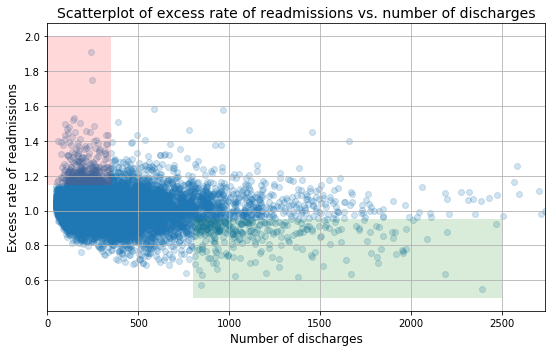

In [155]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of excess rate of readmissions vs. number of discharges', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [156]:
# Your turn

## A. Do you agree with the above analysis and recommendations? Why or why not?

### Initial observations based on the plot above

__Statement:__ Overall, rate of readmissions is trending down with increasing number of discharges

In [171]:
# compute the pearson correlation coefficient
import scipy.stats as stats
r, p_val = stats.pearsonr(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio'])

print("The Pearson correlation coefficient is {}".format(r))
print("The p value is {}".format(p_val))

The Pearson correlation coefficient is -0.09739794351079353
The p value is 1.222547377680967e-25


__Comment:__ There is indeed a negative correlation between the number of discharges and the excess readmission ratio. This correlation is statistically significant (p value is small). However, the coefficient of -0.09 suggests that the correlation is low. 

Therefore, we cannot definitively conclude that hospitals with lower number of discharges with have a higher excess readmission ratio.

__Statement:__ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)

In [172]:
# select data that falls in the 'red' zone
x_red = df.discharges[(df.discharges <= 350) & (df.excess_readmission >= 1.15)]
y_red = df.excess_readmission[(df.discharges <= 350) & (df.excess_readmission >= 1.15)]

The Pearson correlation coefficient is -0.09067863582539633
The p value is 0.08982909686271899


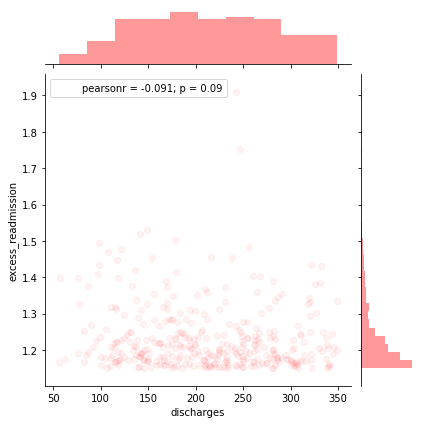

In [173]:
# compute the Pearson correlation coefficient for the 'red' zone
sns.jointplot(x_red, y_red, color='red', alpha=0.05)
r, p_val = stats.pearsonr(x_red, y_red)

print("The Pearson correlation coefficient is {}".format(r))
print("The p value is {}".format(p_val))

__Comment:__ We cannot conclude that there is a higher rate of excess readmissions with lower number od discharges since the negative correlation coefficient (-0.091) is not statistically significant (p > 0.05).

__Statement:__ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

In [174]:
# select data that falls in the 'green' zone
x_green = df.discharges[((df.discharges >= 800) & (df.discharges <= 2500)) & ((df.excess_readmission >= 0.5) & (df.excess_readmission <= 0.95))]
y_green = df.excess_readmission[((df.discharges >= 800) & (df.discharges <= 2500)) & ((df.excess_readmission >= 0.5) & (df.excess_readmission <= 0.95))]

The Pearson correlation coefficient is -0.19148704582005371
The p value is 0.0008398779894182106


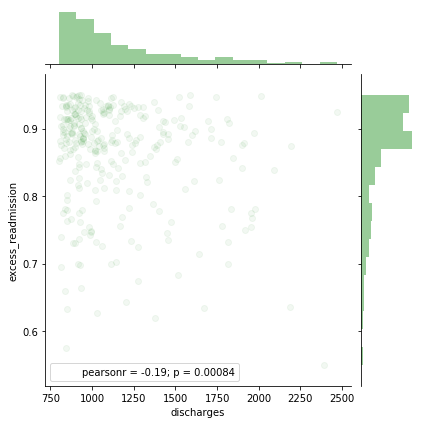

In [175]:
# compute the Pearson correlation coefficient for the 'green' zone
sns.jointplot(x_green, y_green, color='green', alpha=0.05)
r, p_val = stats.pearsonr(x_green, y_green)

print("The Pearson correlation coefficient is {}".format(r))
print("The p value is {}".format(p_val))

__Comment:__ There is a negative correlation between the number of discharges and the excess readmission rate in the 'green' zone. This correlation is statistically significant (p value < 0.05). This is the opposite from the reported observation that there is a positive correlation between the number of discharges and the excess readmission rate.

### Statistics

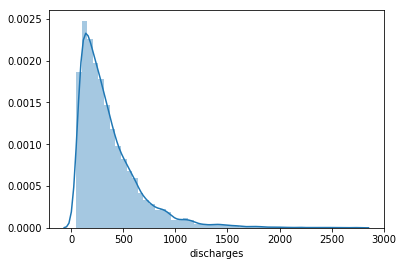

In [176]:
# check if the data has a normal distribution: number of discharges
sns.distplot(df.discharges)

_The number of discharges data is skewed to the left_

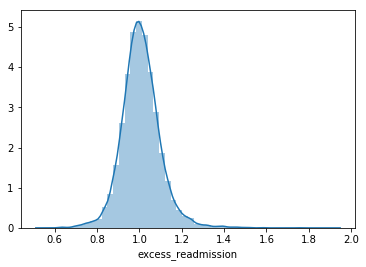

In [177]:
# check if the data has a normal distribution: excess readmission rates
sns.distplot(df.excess_readmission)

_The excess readmission rate data appears to be normally distributed_

In [178]:
# check the distribution of hospitals
print("number of unique hospitals:", clean_hospital_read_df['Hospital Name'].nunique())
# check the distribution of states
print("number of unique states:", clean_hospital_read_df['State'].nunique())

number of unique hospitals: 2879
number of unique states: 51


__Statement:__ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1


In [179]:
# subset the data with number of discharges < 100
less_than_100 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 100)]

# number of hospitals with number of discharges < 100
print("# of hospitals with < 100 discharges:", len(less_than_100))

# compute mean excess readmission rate
print("Observed excess readmission rate:", round(np.mean(less_than_100['Excess Readmission Ratio']), 3))

# compute percentage of hospitals that have excess readmission rate greater than 1
print("Percentage of hospitals with > 1 excess readmission rate:", round(len(less_than_100[(less_than_100['Excess Readmission Ratio'] > 1)]) / len(less_than_100) * 100, 3), '%')

# of hospitals with < 100 discharges: 1188
Observed excess readmission rate: 1.023
Percentage of hospitals with > 1 excess readmission rate: 63.215 %


_The above statement appears to be correct. In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1._

__Statement:__ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [180]:
# subset the data with number of discharges > 1000
greater_than_1000 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1000)]

# number of hospitals with number of discharges < 100
print("# of hospitals with > 1000 discharges:", len(greater_than_1000))

# compute mean excess readmission rate
print("Observed excess readmission rate:", round(np.mean(greater_than_1000['Excess Readmission Ratio']), 3))

# compute percentage of hospitals that have excess readmission rate greater than 1
print("Percentage of hospitals with > 1 excess readmission rate:", round(len(greater_than_1000[(greater_than_1000['Excess Readmission Ratio'] > 1)]) / len(greater_than_1000) * 100, 3), '%')

# of hospitals with > 1000 discharges: 463
Observed excess readmission rate: 0.978
Percentage of hospitals with > 1 excess readmission rate: 44.492 %


_The above statement appears to be correct. In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1._

### Conclusions

__Statement:__ There is a significant correlation between hospital capacity (number of discharges) and readmission rates.


In [181]:
# compute the pearson correlation coefficient
import scipy.stats as stats
r, p_val = stats.pearsonr(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio'])

print("The Pearson correlation coefficient is {}".format(r))
print("The p value is {}".format(p_val))

The Pearson correlation coefficient is -0.09739794351079353
The p value is 1.222547377680967e-25


As stated before, there is a small negative correlation between hospital capacity (number of discharges) and readmission rates and this is statistically significant (small p value).

__Statement:__ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

__Hypothesis testing__
- __Null:__ there is no difference between the readmission rates between large (> 1000 discharges) and small (< 100 discharges) hospitals/facilities
- __Alternate:__ there is a significant difference between the readmission rates between large (> 1000 discharges) and small (< 100 discharges) hospitals/facilities

In [216]:
# two sample t test
t_stat, p_val = stats.ttest_ind(less_than_100['Excess Readmission Ratio'], greater_than_1000['Excess Readmission Ratio'])

print("test statistic:", t_stat)
print("p value:", p_val)

# compute 99% confidence interval
import statsmodels.stats.weightstats as mod

cm = mod.CompareMeans(mod.DescrStatsW(less_than_100['Excess Readmission Ratio']), mod.DescrStatsW(greater_than_1000['Excess Readmission Ratio']))

conf_int = cm.tconfint_diff(alpha=0.01, usevar='unequal')
print("99% confidence interval for the difference of means:", conf_int)

test statistic: 10.060620398500793
p value: 3.778753923341558e-23
99% confidence interval for the difference of means: (0.029225356358290495, 0.05934050164579684)


__Comment:__ According to the low p-value, we can reject the null hypothesis. Therefore, we can conclude that there is a statistically significant difference between the readmission rates between small and large hospitals/facilities. 

Statistically speaking, the recommendations are good since smaller hospitals have higher readmission rates. However, this is not practical. For one, using the number of discharges to gauge hospital size is not always reliable (e.g., large hospitals can have low discharge numbers if they focus on chronic care). Upgrading resource allocation and consolidating hospitals/facilities is not practically supported by the data.

### Regulatory policy recommendations

- Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
- Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

_See above for answers_

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis
   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

__5. Scatterplot analysis__
- Pros: provides an overview of the data trend
- Cons: difficult to identify specific sections of the data; lots of overlap in data points

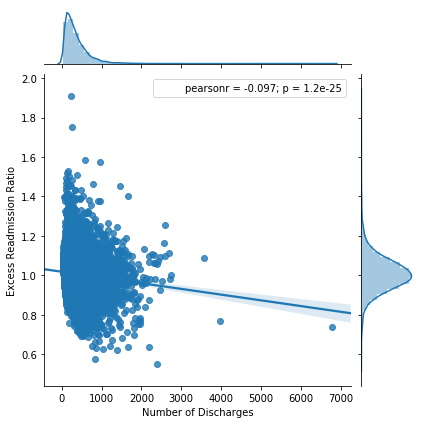

In [218]:
# alternate plot
sns.jointplot(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio'], kind='reg')